# Data Analytics - Challenge


The goal of this challenge is to analyze a restaurant invoices. Some celles are already implemented, you just need to **run** them. Some other cells need you to write some code.

Start the challenge by running the two following cells:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

---

❓ Display the 10 first rows of the dataset (no need to sort)

<details>
    <summary>🙈 Reveal solution</summary>

<p>
You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html"><code>pandas.DataFrame.head()</code></a> function:
    
<pre>
tips_df.head(10)
</pre>
</p>
</details>

In [12]:
# Your code here
tips_df.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


---

❓ How many days per week is the restaurant open?

<details>
    <summary>🙈 Reveal solution</summary>

<p>
You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html"><code>pandas.Series.unique()</code></a> function combiend with the <code>len()</code> Python built-in.
    
<pre>
len(tips_df['day'].unique())
</pre>
</p>
</details>

In [17]:
# Your code here
len(tips_df['day'].unique())


4

---

❓ What day of the week is there more bills? Plot this with a Seaborn Countplot.

<details>
    <summary>🙈 Reveal solution</summary>

<p>
<pre>
tips_df['day'].value_counts()
</pre>
    
<pre>
sns.countplot(data=tips_df, x='day', order=['Thur', 'Fri', 'Sat', 'Sun'])
</pre>
</p>
</details>

In [31]:
# Your code here
tips_df['day'].value_counts()


Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<AxesSubplot:xlabel='day', ylabel='count'>

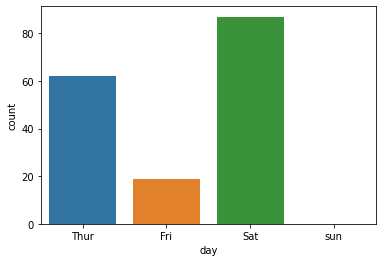

In [32]:
# Your plot here
sns.countplot(data=tips_df,x='day',order = ['Thur','Fri','Sat','sun'])


---

❓ Try to do some other countplots, varying `x` with one of the categorical column (`sex`, `smoker`, `time`)

<AxesSubplot:xlabel='day', ylabel='count'>

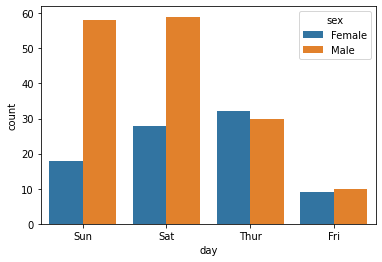

In [68]:
#Your first plot here
sns.countplot(data=tips_df,x='day',hue='sex')
#To add a cell, you can go in the menu and do Insert > Insert cell below

+  Observation:  male customers on sun , sat are much more

<AxesSubplot:xlabel='day', ylabel='count'>

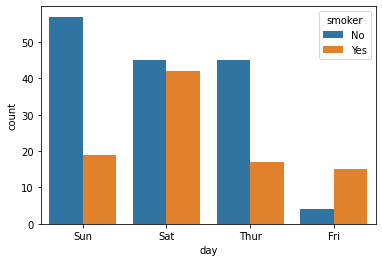

In [67]:
sns.countplot(data=tips_df,x='day',hue='smoker')

+  Observation :  we can note that the air quality would be bad on SUNDAY 
+ because of more consumption of smoke by customer
+ we can use airpurifier in resturant to maintain air  quality  normal

<AxesSubplot:xlabel='day', ylabel='count'>

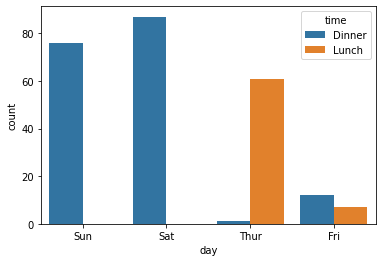

In [66]:
sns.countplot(data=tips_df,x='day',hue='time')

+ Observation: in the below plot we observe sale and customer 
on dinner time high in week on sat and sun

'''
❓ Let's plot the distribution of `total_bill` based on a given category. Start with `day`:

```python
sns.catplot(data=tips_df, x='day', y='total_bill', kind="box")
```

1. Change the value of `x` with one of the categorical column of the dataset and the value of `kind` (`"bar"`, `"box"`, `"violin"`, `"boxen"`)
1. Change the value of `y` with one of the numerical column of the dataset'''

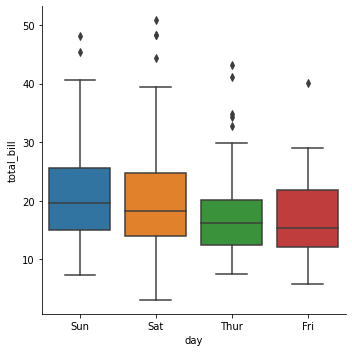

In [53]:
# Your experiments here
sns.catplot(data=tips_df, x='day', y='total_bill', kind="box")

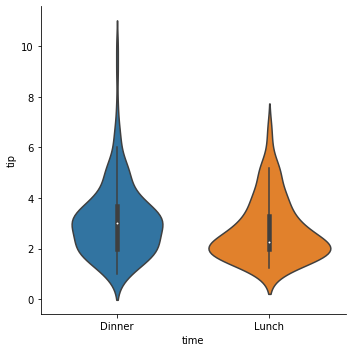

In [65]:
sns.catplot(data=tips_df, x='time', y='tip', kind="violin")

+ Observation : as we see time from 6 to 10 dollar the tips are higher in dinner time usually

---
❓ Let's use [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `col` in the first line with another column (e.g. `"time"`). Run the cell again. What do you observe?

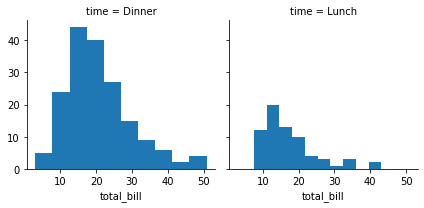

In [64]:
g = sns.FacetGrid(tips_df, col="time")
g.map(plt.hist, "total_bill")

+ Observation : i saw that total bill at dinner way more higher

---
❓ Let's continue with FacetGrid and add a `row="smoker"` parameter. How many cells do you get in the plot?

<details>
    <summary>🙈 Reveal solution</summary>

You get 2 * 4 = 8 cells!
    
<pre>
g = sns.FacetGrid(tips_df, col="day", row="smoker")
g.map(plt.hist, "total_bill")
</pre>
</p>
</details>

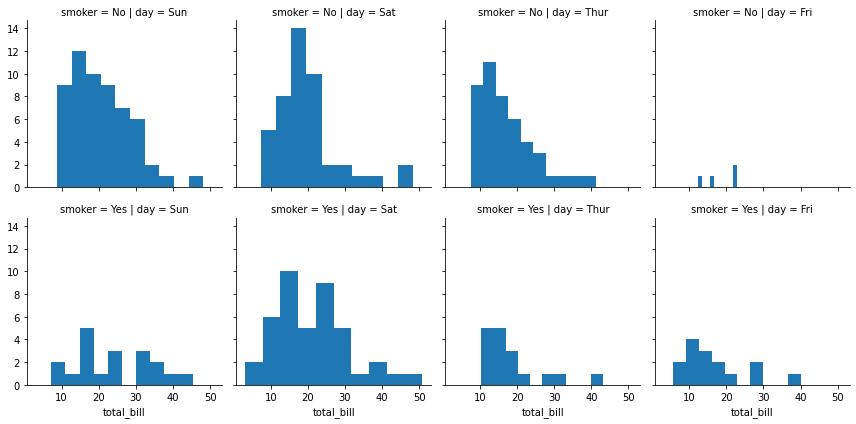

In [73]:
# Your code here
g  = sns.FacetGrid(tips_df,col='day',row='smoker')
g.map(plt.hist,"total_bill")

## Correlation

Let's start looking for correlation between columns in the dataset.


---
❓ What is your intuition about the relationship between the columns `tip` and `total_bill`?

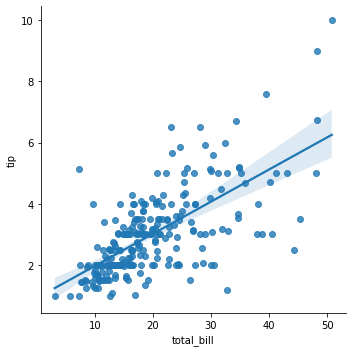

In [80]:
sns.lmplot(x="total_bill", y="tip", data=tips_df)

In [88]:
print(tips_df['tip'].corr(tips_df['total_bill']))

0.6757341092113641


+ Observation : the corr is. 0.67 slightly correlated with eachother in 
+ positive direction

---
❓ Let's look at the data to see if our intuition is correct. We will do a **scatterplot** with `x` being `total_bill` and `y` the tip.

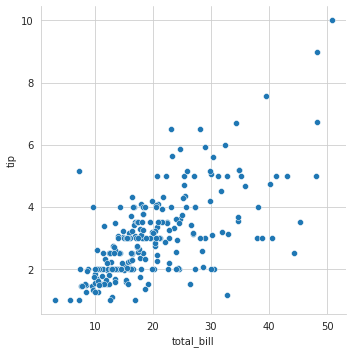

In [74]:
with sns.axes_style(style="whitegrid"):
    sns.relplot(x="total_bill", y="tip", data=tips_df)

---
❓ Another way of looking at this data is to use a [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

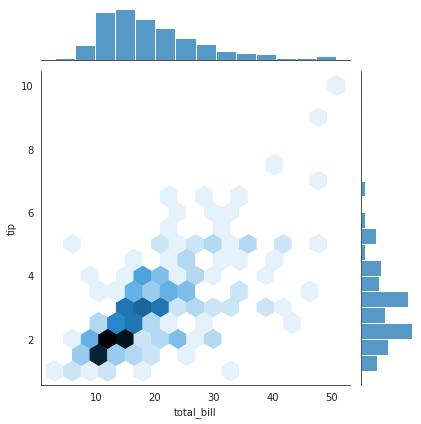

In [75]:
with sns.axes_style("white"):
    sns.jointplot(x="total_bill", y="tip", kind="hex", data=tips_df)

❓ A very useful tool to **identify** correlations is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

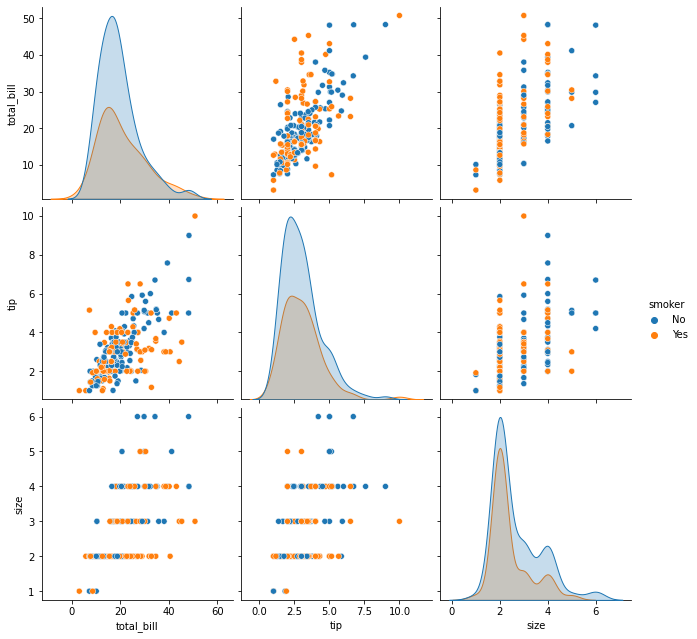

In [78]:
sns.pairplot(tips_df, height=3, hue="smoker")

## Regression

We are not doing Machine Learning yet but we can use [`seaborn.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to graphically read a linear correlation between two columns:

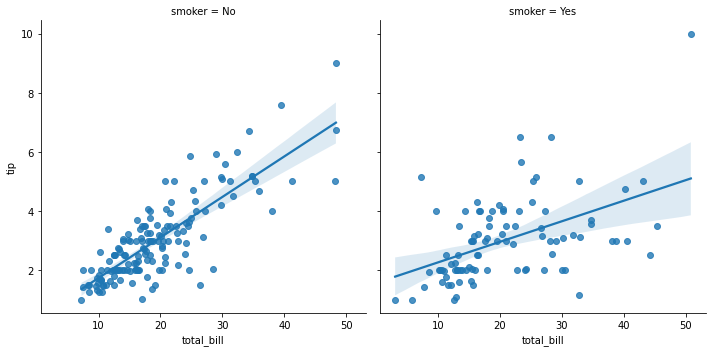

In [79]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips_df)

## Good job!

Save your notebook, go back to the **Le Wagon - Learn** platform to upload your progress. A quiz awaits you!